In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv(r'C:\Users\allen.tsai\train.csv')
test = pd.read_csv(r'C:\Users\allen.tsai\test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [6]:
train.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

## Age與Cabin有缺失值

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Blackwell, Mr. Stephen Weart",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
PassengerId = test['PassengerId']

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


## Age與Cabin有缺失值
#### 可以將train與test合併填補缺失值

In [11]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Lingane, Mr. John",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [12]:
data = train.append(test, sort=False)

In [13]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [14]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 確認空準確率

In [16]:
data['Survived'].value_counts(normalize=True)

0.0    0.616162
1.0    0.383838
Name: Survived, dtype: float64

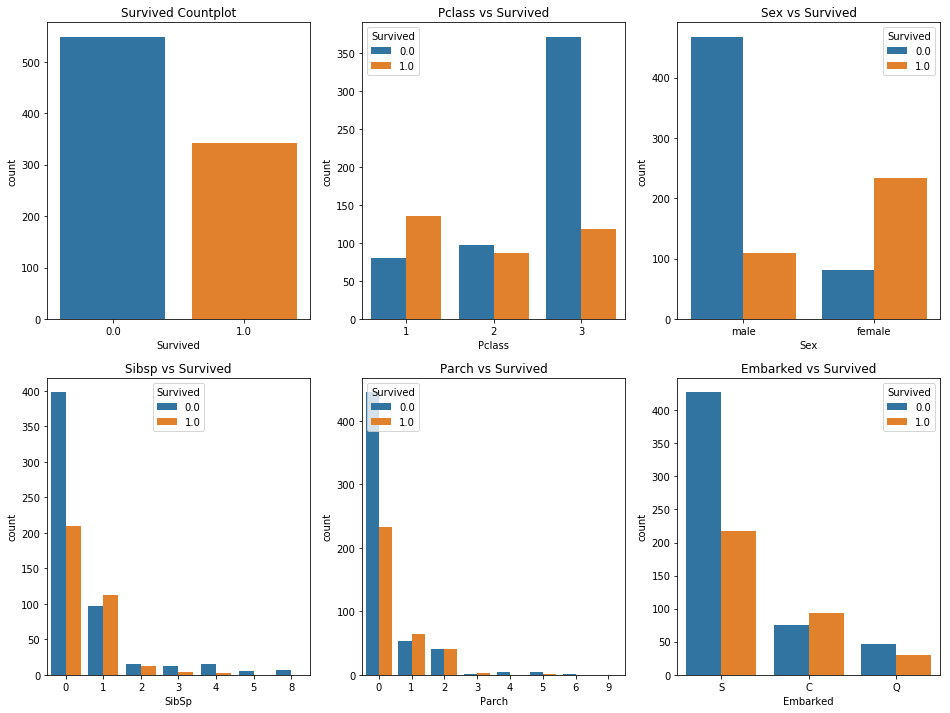

In [17]:
plt.figure(figsize=(16,12))

plt.subplot(2,3,1)
plt.title('Survived Countplot')
sns.countplot(data['Survived'])

plt.subplot(2,3,2)
plt.title('Pclass vs Survived')
sns.countplot(data['Pclass'], hue=data['Survived'])

plt.subplot(2,3,3)
plt.title('Sex vs Survived')
sns.countplot(data['Sex'], hue=data['Survived'])

plt.subplot(2,3,4)
plt.title('Sibsp vs Survived')
sns.countplot(data['SibSp'], hue=data['Survived'])

plt.subplot(2,3,5)
plt.title('Parch vs Survived')
sns.countplot(data['Parch'], hue=data['Survived'])

plt.subplot(2,3,6)
plt.title('Embarked vs Survived')
sns.countplot(data['Embarked'], hue=data['Survived'])

In [18]:
data['Family_Size'] = data['SibSp'] + data['Parch'] + 1

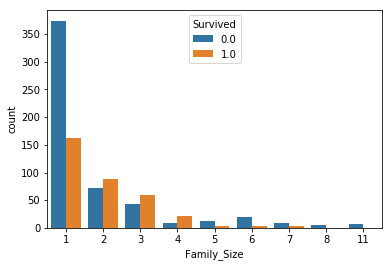

In [19]:
sns.countplot(data['Family_Size'], hue=data['Survived'])

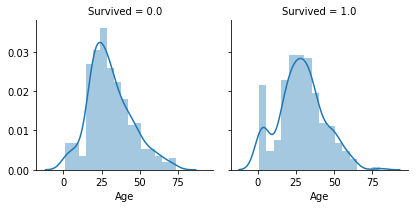

In [20]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age', kde='True')

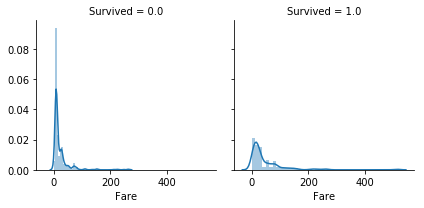

In [21]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Fare', kde='True')

### 篩選特徵

In [22]:
object_features = []
int_features = []
float_features = []

for i in data.columns:
    if data[i].dtype == 'object':
        object_features.append(i)
    elif data[i].dtype == 'int64':
        int_features.append(i)
    else:
        float_features.append(i)

In [23]:
object_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [24]:
int_features

['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Family_Size']

In [25]:
float_features

['Survived', 'Age', 'Fare']

In [26]:
nonobject_features = int_features + float_features
nonobject_features

['PassengerId',
 'Pclass',
 'SibSp',
 'Parch',
 'Family_Size',
 'Survived',
 'Age',
 'Fare']

In [27]:
data[nonobject_features].head()

,PassengerId,Pclass,SibSp,Parch,Family_Size,Survived,Age,Fare
0,1,3,1,0,2,0.0,22.0,7.2500
1,2,1,1,0,2,1.0,38.0,71.2833
2,3,3,0,0,1,1.0,26.0,7.9250
3,4,1,1,0,2,1.0,35.0,53.1000
4,5,3,0,0,1,0.0,35.0,8.0500


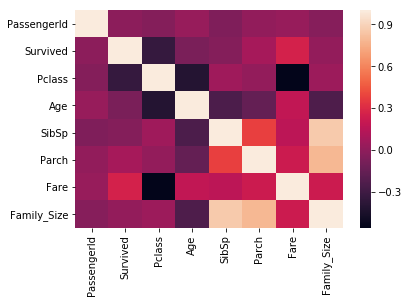

In [28]:
sns.heatmap(data.corr())

In [29]:
data.corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
Family_Size    0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

### 跟前面三項有較高相關係數

In [30]:
data['Family_minus'] = data['Parch'] - data['SibSp'] + 1

In [31]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Family_minus
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428,-0.031437,0.060581
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639,0.098615
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629,0.050027,-0.044098
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740,-0.240229,0.097351
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238,0.861952,-0.666754
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539,0.792296,0.442225
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000,0.226492,0.023059
Family_Size,-0.031437,0.016639,0.050027,-0.240229,0.861952,0.792296,0.226492,1.000000,-0.196862
Family_minus,0.060581,0.098615,-0.044098,0.097351,-0.666754,0.442225,0.023059,-0.196862,1.000000


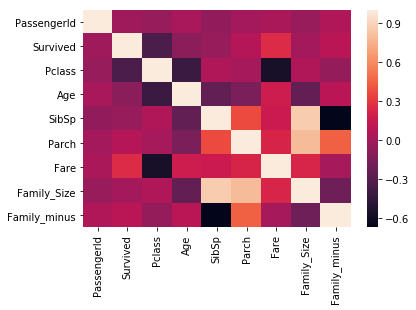

In [32]:
sns.heatmap(data.corr())

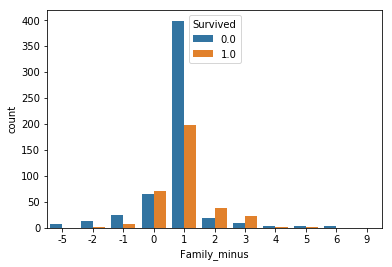

In [33]:
sns.countplot(data['Family_minus'], hue=data['Survived'])

In [34]:
data.select_dtypes(include=['object']).apply(pd.Series.nunique)

Name        1307
Sex            2
Ticket       929
Cabin        186
Embarked       3
dtype: int64

In [35]:
data.isnull().sum()

PassengerId        0
Survived         418
Pclass             0
Name               0
Sex                0
Age              263
SibSp              0
Parch              0
Ticket             0
Fare               1
Cabin           1014
Embarked           2
Family_Size        0
Family_minus       0
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

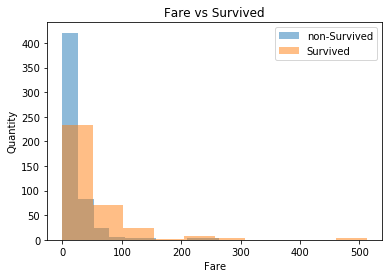

In [36]:
col = 'Fare'
plt.hist(data[data['Survived']==0][col], 10, alpha=0.5, label='non-Survived')
plt.hist(data[data['Survived']==1][col], 10, alpha=0.5, label='Survived')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Quantity')
plt.title('Fare vs Survived')
plt.show

ValueError: max must be larger than min in range parameter.

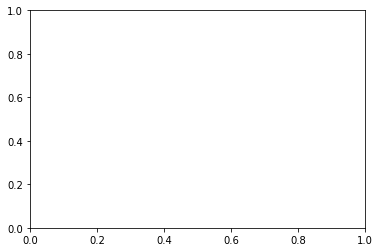

In [37]:
col = 'Age'
plt.hist(data[data['Survived']==0][col], 10, alpha=0.5, label='non-Survived')
plt.hist(data[data['Survived']==1][col], 10, alpha=0.5, label='Survived')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Quantity')
plt.title('Age vs Survived')
plt.show()

## 可以從上方Fare與Age的數據來看，數據偏態嚴重

ValueError: max must be larger than min in range parameter.

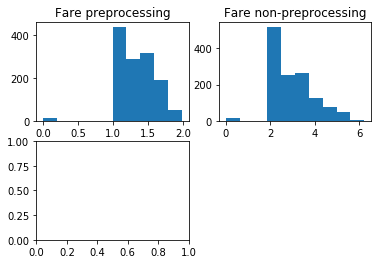

In [44]:
plt.subplot(2,2,1)
plt.hist(np.log1p(data['Fare']))
plt.title('Fare preprocessing')

plt.subplot(2,2,2)
plt.hist(data['Fare'])
plt.title('Fare non-preprocessing')

plt.subplot(2,2,3)
plt.hist(np.sqrt(data['Age']))
plt.title('Age preprocessing')

plt.subplot(2,2,4)
plt.hist(data['Age'])
plt.title('Age non-preprocessing')

### 可以使用log1p或sqrt來解決偏態的問題
### Fare僅有一個缺失值，先以中位數填補

In [38]:
data['Fare'] = data['Fare'].fillna(data['Fare'].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
PassengerId     1309 non-null int64
Survived        891 non-null float64
Pclass          1309 non-null int64
Name            1309 non-null object
Sex             1309 non-null object
Age             1046 non-null float64
SibSp           1309 non-null int64
Parch           1309 non-null int64
Ticket          1309 non-null object
Fare            1309 non-null float64
Cabin           295 non-null object
Embarked        1307 non-null object
Family_Size     1309 non-null int64
Family_minus    1309 non-null int64
dtypes: float64(3), int64(6), object(5)
memory usage: 159.8+ KB


#### 將Fare資料進行偏態處理

In [39]:
data['Fare'] = np.log1p(data['Fare'])

### 將Embarked的缺失值以none填補，之後使用LabelEncoder

In [40]:
data['Embarked'] = data['Embarked'].fillna('None')

In [41]:
data = data.drop(['PassengerId'], axis=1)

In [42]:
data['Sex'] = data['Sex'].map({'male':1, 'female':0})

In [43]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_minus
0,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,2.110213,NaN,S,2,0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.280593,C85,C,2,0
2,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.188856,NaN,S,1,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.990834,C123,S,2,0
4,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.202765,NaN,S,1,1


### 先暫時將Sex處裡，再以OneHotEnding處裡Embarked

In [45]:
#Embarked_dummies = pd.get_dummies(data.Embarked).astype('int64')
data = pd.get_dummies(data=data, columns = ['Embarked'])
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Family_Size,Family_minus,Embarked_C,Embarked_None,Embarked_Q,Embarked_S
0,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,2.110213,NaN,2,0,0,0,0,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.280593,C85,2,0,1,0,0,0
2,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.188856,NaN,1,1,0,0,0,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.990834,C123,2,0,0,0,0,1
4,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.202765,NaN,1,1,0,0,0,1


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
Survived         891 non-null float64
Pclass           1309 non-null int64
Name             1309 non-null object
Sex              1309 non-null int64
Age              1046 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
Cabin            295 non-null object
Family_Size      1309 non-null int64
Family_minus     1309 non-null int64
Embarked_C       1309 non-null uint8
Embarked_None    1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
dtypes: float64(3), int64(6), object(3), uint8(4)
memory usage: 154.7+ KB


In [47]:
#from sklearn.preprocessing import LabelEncoder

#Labelencoder = LabelEncoder()
#data['Embarked'] = Labelencoder.fit_transform(data['Embarked']).astype('int64')

In [48]:
data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Family_Size,Family_minus,Embarked_C,Embarked_None,Embarked_Q,Embarked_S
413,NaN,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,2.202765,NaN,1,1,0,0,0,1
414,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,4.699571,C105,1,1,1,0,0,0
415,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,2.110213,NaN,1,1,0,0,0,1
416,NaN,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,2.202765,NaN,1,1,0,0,0,1
417,NaN,3,"Peter, Master. Michael J",1,NaN,1,1,2668,3.150952,NaN,3,1,1,0,0,0


### 重新取整數

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
Survived         891 non-null float64
Pclass           1309 non-null int64
Name             1309 non-null object
Sex              1309 non-null int64
Age              1046 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
Cabin            295 non-null object
Family_Size      1309 non-null int64
Family_minus     1309 non-null int64
Embarked_C       1309 non-null uint8
Embarked_None    1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
dtypes: float64(3), int64(6), object(3), uint8(4)
memory usage: 154.7+ KB


In [50]:
object_features = []
int_features = []
float_features = []

for i in data.columns:
    if data[i].dtype == 'object':
        object_features.append(i)
    elif data[i].dtype == 'int64':
        int_features.append(i)
    else:
        float_features.append(i)

In [51]:
int_features

['Pclass', 'Sex', 'SibSp', 'Parch', 'Family_Size', 'Family_minus']

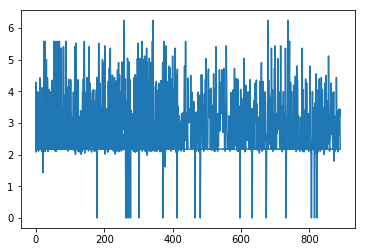

In [53]:
plt.plot(data['Fare'])

In [56]:
a = data
type(a)

pandas.core.frame.DataFrame

In [58]:
a['Z_Fare'] = data['Fare'].apply(lambda x : (data['Fare'].mean() - x)/data['Fare'].std())

(array([ 17.,   0.,   3., 514., 251., 261., 129.,  80.,  50.,   4.]),
 array([0.        , 0.62409174, 1.24818347, 1.87227521, 2.49636694,
        3.12045868, 3.74455041, 4.36864215, 4.99273388, 5.61682562,
        6.24091735]),
 <a list of 10 Patch objects>)

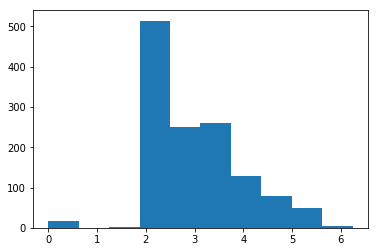

In [62]:
plt.hist(data['Fare'])

(array([  4.,  50.,  80., 129., 261., 251., 514.,   3.,   0.,  17.]),
 array([-3.36839845, -2.72388936, -2.07938027, -1.43487118, -0.79036209,
        -0.145853  ,  0.49865609,  1.14316518,  1.78767427,  2.43218336,
         3.07669245]),
 <a list of 10 Patch objects>)

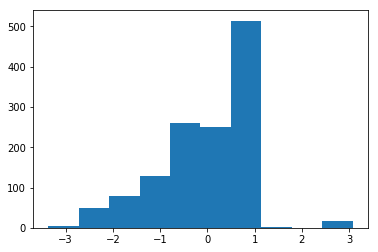

In [61]:
plt.hist(a['Z_Fare'])

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
MMEncoder = MinMaxScaler()
data[int_features] = MMEncoder.fit_transform(data[int_features])

In [65]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Family_Size,Family_minus,Embarked_C,Embarked_None,Embarked_Q,Embarked_S,Z_Fare
0,0.0,1.0,"Braund, Mr. Owen Harris",1.0,22.0,0.125,0.0,A/5 21171,2.110213,NaN,0.1,0.357143,0,0,0,1,0.897443
1,1.0,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,0.125,0.0,PC 17599,4.280593,C85,0.1,0.357143,1,0,0,0,-1.343942
2,1.0,1.0,"Heikkinen, Miss. Laina",0.0,26.0,0.000,0.0,STON/O2. 3101282,2.188856,NaN,0.0,0.428571,0,0,0,1,0.816227
3,1.0,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,0.125,0.0,113803,3.990834,C123,0.1,0.357143,0,0,0,1,-1.044703
4,0.0,1.0,"Allen, Mr. William Henry",1.0,35.0,0.000,0.0,373450,2.202765,NaN,0.0,0.428571,0,0,0,1,0.801864


In [66]:
data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Family_Size,Family_minus,Embarked_C,Embarked_None,Embarked_Q,Embarked_S,Z_Fare
413,NaN,1.0,"Spector, Mr. Woolf",1.0,NaN,0.000,0.000000,A.5. 3236,2.202765,NaN,0.0,0.428571,0,0,0,1,0.801864
414,NaN,0.0,"Oliva y Ocana, Dona. Fermina",0.0,39.0,0.000,0.000000,PC 17758,4.699571,C105,0.0,0.428571,1,0,0,0,-1.776626
415,NaN,1.0,"Saether, Mr. Simon Sivertsen",1.0,38.5,0.000,0.000000,SOTON/O.Q. 3101262,2.110213,NaN,0.0,0.428571,0,0,0,1,0.897443
416,NaN,1.0,"Ware, Mr. Frederick",1.0,NaN,0.000,0.000000,359309,2.202765,NaN,0.0,0.428571,0,0,0,1,0.801864
417,NaN,1.0,"Peter, Master. Michael J",1.0,NaN,0.125,0.111111,2668,3.150952,NaN,0.2,0.428571,1,0,0,0,-0.177344


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 17 columns):
Survived         891 non-null float64
Pclass           1309 non-null float64
Name             1309 non-null object
Sex              1309 non-null float64
Age              1046 non-null float64
SibSp            1309 non-null float64
Parch            1309 non-null float64
Ticket           1309 non-null object
Fare             1309 non-null float64
Cabin            295 non-null object
Family_Size      1309 non-null float64
Family_minus     1309 non-null float64
Embarked_C       1309 non-null uint8
Embarked_None    1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Z_Fare           1309 non-null float64
dtypes: float64(10), object(3), uint8(4)
memory usage: 164.9+ KB


In [68]:
data['Embarked_C'] = data['Embarked_C'].astype('float64')
data['Embarked_None'] = data['Embarked_None'].astype('float64')
data['Embarked_Q'] = data['Embarked_Q'].astype('float64')
data['Embarked_S'] = data['Embarked_S'].astype('float64')

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 17 columns):
Survived         891 non-null float64
Pclass           1309 non-null float64
Name             1309 non-null object
Sex              1309 non-null float64
Age              1046 non-null float64
SibSp            1309 non-null float64
Parch            1309 non-null float64
Ticket           1309 non-null object
Fare             1309 non-null float64
Cabin            295 non-null object
Family_Size      1309 non-null float64
Family_minus     1309 non-null float64
Embarked_C       1309 non-null float64
Embarked_None    1309 non-null float64
Embarked_Q       1309 non-null float64
Embarked_S       1309 non-null float64
Z_Fare           1309 non-null float64
dtypes: float64(14), object(3)
memory usage: 200.7+ KB


In [70]:
data = data.drop(['Z_Fare'], axis=1)

In [71]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Family_Size,Family_minus,Embarked_C,Embarked_None,Embarked_Q,Embarked_S
0,0.0,1.0,"Braund, Mr. Owen Harris",1.0,22.0,0.125,0.0,A/5 21171,2.110213,NaN,0.1,0.357143,0.0,0.0,0.0,1.0
1,1.0,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,0.125,0.0,PC 17599,4.280593,C85,0.1,0.357143,1.0,0.0,0.0,0.0
2,1.0,1.0,"Heikkinen, Miss. Laina",0.0,26.0,0.000,0.0,STON/O2. 3101282,2.188856,NaN,0.0,0.428571,0.0,0.0,0.0,1.0
3,1.0,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,0.125,0.0,113803,3.990834,C123,0.1,0.357143,0.0,0.0,0.0,1.0
4,0.0,1.0,"Allen, Mr. William Henry",1.0,35.0,0.000,0.0,373450,2.202765,NaN,0.0,0.428571,0.0,0.0,0.0,1.0


### 使用隨機森林來分析看看

In [72]:
data.shape

(1309, 16)

In [73]:
train_Y = data['Survived'].iloc[:891]
train_Y.tail()

886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, dtype: float64

In [74]:
train_X = data.drop(['Survived', 'Name', 'Cabin', 'Ticket', 'Age'], axis=1).iloc[:891]
train_X.tail()

,Pclass,Sex,SibSp,Parch,Fare,Family_Size,Family_minus,Embarked_C,Embarked_None,Embarked_Q,Embarked_S
886,0.5,1.0,0.000,0.000000,2.639057,0.0,0.428571,0.0,0.0,0.0,1.0
887,0.0,0.0,0.000,0.000000,3.433987,0.0,0.428571,0.0,0.0,0.0,1.0
888,1.0,0.0,0.125,0.222222,3.196630,0.3,0.500000,0.0,0.0,0.0,1.0
889,0.0,1.0,0.000,0.000000,3.433987,0.0,0.428571,1.0,0.0,0.0,0.0
890,1.0,1.0,0.000,0.000000,2.169054,0.0,0.428571,0.0,0.0,1.0,0.0


(array([ 15.,   0.,   2., 350., 167., 182.,  85.,  59.,  28.,   3.]),
 array([0.        , 0.62409174, 1.24818347, 1.87227521, 2.49636694,
        3.12045868, 3.74455041, 4.36864215, 4.99273388, 5.61682562,
        6.24091735]),
 <a list of 10 Patch objects>)

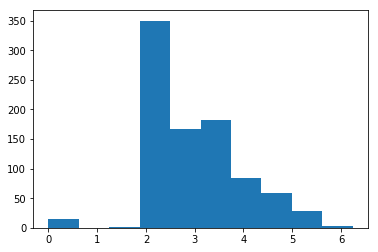

In [75]:
plt.hist(train_X['Fare'])

In [76]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
Pclass           891 non-null float64
Sex              891 non-null float64
SibSp            891 non-null float64
Parch            891 non-null float64
Fare             891 non-null float64
Family_Size      891 non-null float64
Family_minus     891 non-null float64
Embarked_C       891 non-null float64
Embarked_None    891 non-null float64
Embarked_Q       891 non-null float64
Embarked_S       891 non-null float64
dtypes: float64(11)
memory usage: 83.5 KB


In [78]:
train_X.select_dtypes(include=['float64']).head()

,Pclass,Sex,SibSp,Parch,Fare,Family_Size,Family_minus,Embarked_C,Embarked_None,Embarked_Q,Embarked_S
0,1.0,1.0,0.125,0.0,2.110213,0.1,0.357143,0.0,0.0,0.0,1.0
1,0.0,0.0,0.125,0.0,4.280593,0.1,0.357143,1.0,0.0,0.0,0.0
2,1.0,0.0,0.000,0.0,2.188856,0.0,0.428571,0.0,0.0,0.0,1.0
3,0.0,0.0,0.125,0.0,3.990834,0.1,0.357143,0.0,0.0,0.0,1.0
4,1.0,1.0,0.000,0.0,2.202765,0.0,0.428571,0.0,0.0,0.0,1.0


In [79]:
train_X.select_dtypes(include=['float64']).apply(pd.Series.nunique)

Pclass             3
Sex                2
SibSp              7
Parch              7
Fare             248
Family_Size        9
Family_minus      10
Embarked_C         2
Embarked_None      2
Embarked_Q         2
Embarked_S         2
dtype: int64

### 試試看使用LogisticRegression的情形

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [65]:
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.7845308173986191

### 如果沒有Family_minus這個項次的話，分數會幾分?

In [66]:
estimator = LogisticRegression()
cross_val_score(estimator, train_X.drop(['Family_minus'], axis=1), train_Y, cv=5).mean()

0.7822836263873831

### 利用相關係數建立起來的Family_minus看起來仍有一定幫助

### 如果是隨機森林的話，準確率如何?

In [67]:
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.793576075072337

### 如果沒有Family_minus這個項次的話，分數會幾分?

In [69]:
estimator = RandomForestClassifier()
cross_val_score(estimator, train_X.drop(['Family_minus'], axis=1), train_Y, cv=5).mean()

0.7935822812148576

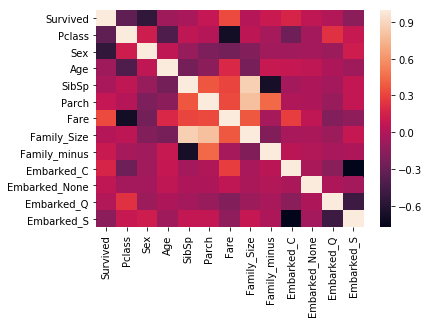

In [70]:
sns.heatmap(data.corr())

In [71]:
data.corr()['Survived'].sort_values()

Sex             -0.543351
Pclass          -0.338481
Embarked_S      -0.155660
Age             -0.077221
SibSp           -0.035322
Embarked_Q       0.003650
Family_Size      0.016639
Embarked_None    0.060095
Parch            0.081629
Family_minus     0.098615
Embarked_C       0.168240
Fare             0.329862
Survived         1.000000
Name: Survived, dtype: float64

### 如果是梯度提升樹的話，準確率如何?

In [72]:
from sklearn.ensemble import GradientBoostingRegressor

estimator = GradientBoostingRegressor()
cross_val_score(estimator, train_X.drop(['Family_minus'], axis=1), train_Y, cv=5).mean()

0.4234957858896163

In [73]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [74]:
model = Sequential()

In [75]:
model.add(Dense(units=64, input_dim=11, kernel_initializer='uniform', activation='relu'))

In [76]:
model.add(Dropout(0.2))

In [77]:
model.add(Dense(units=64, input_dim=11, kernel_initializer='uniform', activation='relu'))

In [78]:
model.add(Dropout(0.2))

In [79]:
model.add(Dense(units=1, kernel_initializer='normal',activation='sigmoid'))

In [80]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [81]:
train_history = model.fit(x=train_X, y = train_Y, validation_split=0.2, epochs=100, batch_size=30, verbose=2)

Epoch 1/100
24/24 - 0s - loss: 0.6854 - accuracy: 0.6124 - val_loss: 0.6707 - val_accuracy: 0.6425
Epoch 2/100
24/24 - 0s - loss: 0.6632 - accuracy: 0.6096 - val_loss: 0.6259 - val_accuracy: 0.6425
Epoch 3/100
24/24 - 0s - loss: 0.6197 - accuracy: 0.6404 - val_loss: 0.5526 - val_accuracy: 0.7207
Epoch 4/100
24/24 - 0s - loss: 0.5588 - accuracy: 0.7079 - val_loss: 0.4880 - val_accuracy: 0.7989
Epoch 5/100
24/24 - 0s - loss: 0.5169 - accuracy: 0.7739 - val_loss: 0.4411 - val_accuracy: 0.8045
Epoch 6/100
24/24 - 0s - loss: 0.4945 - accuracy: 0.7809 - val_loss: 0.4312 - val_accuracy: 0.8156
Epoch 7/100
24/24 - 0s - loss: 0.4865 - accuracy: 0.7795 - val_loss: 0.4250 - val_accuracy: 0.8212
Epoch 8/100
24/24 - 0s - loss: 0.4825 - accuracy: 0.7697 - val_loss: 0.4229 - val_accuracy: 0.8212
Epoch 9/100
24/24 - 0s - loss: 0.4750 - accuracy: 0.7907 - val_loss: 0.4204 - val_accuracy: 0.8212
Epoch 10/100
24/24 - 0s - loss: 0.4805 - accuracy: 0.7865 - val_loss: 0.4283 - val_accuracy: 0.8101
Epoch 11/

24/24 - 0s - loss: 0.4393 - accuracy: 0.8020 - val_loss: 0.3961 - val_accuracy: 0.8324
Epoch 84/100
24/24 - 0s - loss: 0.4437 - accuracy: 0.8062 - val_loss: 0.3949 - val_accuracy: 0.8380
Epoch 85/100
24/24 - 0s - loss: 0.4443 - accuracy: 0.8006 - val_loss: 0.3981 - val_accuracy: 0.8380
Epoch 86/100
24/24 - 0s - loss: 0.4382 - accuracy: 0.8020 - val_loss: 0.3967 - val_accuracy: 0.8380
Epoch 87/100
24/24 - 0s - loss: 0.4431 - accuracy: 0.8048 - val_loss: 0.3979 - val_accuracy: 0.8268
Epoch 88/100
24/24 - 0s - loss: 0.4500 - accuracy: 0.8006 - val_loss: 0.3942 - val_accuracy: 0.8324
Epoch 89/100
24/24 - 0s - loss: 0.4400 - accuracy: 0.8104 - val_loss: 0.3971 - val_accuracy: 0.8380
Epoch 90/100
24/24 - 0s - loss: 0.4458 - accuracy: 0.8076 - val_loss: 0.3949 - val_accuracy: 0.8268
Epoch 91/100
24/24 - 0s - loss: 0.4440 - accuracy: 0.8062 - val_loss: 0.3992 - val_accuracy: 0.8268
Epoch 92/100
24/24 - 0s - loss: 0.4436 - accuracy: 0.8104 - val_loss: 0.3967 - val_accuracy: 0.8324
Epoch 93/100


In [82]:
def show_train_history(train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

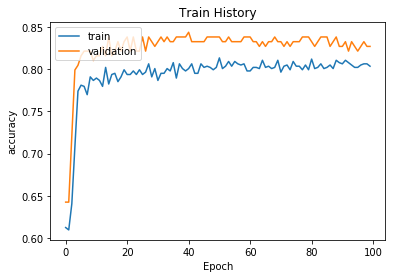

In [83]:
show_train_history('accuracy', 'val_accuracy')

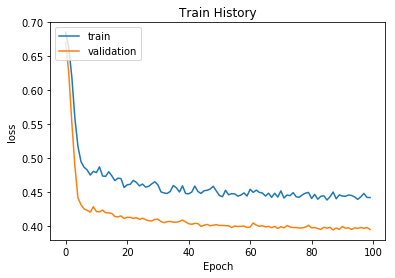

In [84]:
show_train_history('loss', 'val_loss')

In [85]:
train_X.head()

,Pclass,Sex,SibSp,Parch,Fare,Family_Size,Family_minus,Embarked_C,Embarked_None,Embarked_Q,Embarked_S
0,1.0,1.0,0.125,0.0,2.110213,0.1,0.357143,0.0,0.0,0.0,1.0
1,0.0,0.0,0.125,0.0,4.280593,0.1,0.357143,1.0,0.0,0.0,0.0
2,1.0,0.0,0.000,0.0,2.188856,0.0,0.428571,0.0,0.0,0.0,1.0
3,0.0,0.0,0.125,0.0,3.990834,0.1,0.357143,0.0,0.0,0.0,1.0
4,1.0,1.0,0.000,0.0,2.202765,0.0,0.428571,0.0,0.0,0.0,1.0


In [86]:
test_X = data.drop(['Survived', 'Name', 'Cabin', 'Ticket', 'Age'], axis=1).iloc[891:]
test_X.tail()

,Pclass,Sex,SibSp,Parch,Fare,Family_Size,Family_minus,Embarked_C,Embarked_None,Embarked_Q,Embarked_S
413,1.0,1.0,0.000,0.000000,2.202765,0.0,0.428571,0.0,0.0,0.0,1.0
414,0.0,0.0,0.000,0.000000,4.699571,0.0,0.428571,1.0,0.0,0.0,0.0
415,1.0,1.0,0.000,0.000000,2.110213,0.0,0.428571,0.0,0.0,0.0,1.0
416,1.0,1.0,0.000,0.000000,2.202765,0.0,0.428571,0.0,0.0,0.0,1.0
417,1.0,1.0,0.125,0.111111,3.150952,0.2,0.428571,1.0,0.0,0.0,0.0


In [87]:
all_probabilit_orgin = model.predict(test_X)

### MLP訓練時刪掉Family_minus與Family_size會如何?

In [88]:
model = Sequential()

In [89]:
model.add(Dense(units=64, input_dim=9, kernel_initializer='uniform', activation='relu'))

In [90]:
model.add(Dropout(0.2))

In [91]:
model.add(Dense(units=64, input_dim=11, kernel_initializer='uniform', activation='relu'))

In [92]:
model.add(Dropout(0.2))

In [93]:
model.add(Dense(units=1, kernel_initializer='normal',activation='sigmoid'))

In [94]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [95]:
train_history = model.fit(x=train_X.drop(['Family_minus', 'Family_Size'] ,axis=1), y = train_Y, validation_split=0.2, epochs=100, batch_size=30, verbose=2)

Epoch 1/100
24/24 - 0s - loss: 0.6867 - accuracy: 0.6222 - val_loss: 0.6698 - val_accuracy: 0.6425
Epoch 2/100
24/24 - 0s - loss: 0.6550 - accuracy: 0.6306 - val_loss: 0.6034 - val_accuracy: 0.6927
Epoch 3/100
24/24 - 0s - loss: 0.5865 - accuracy: 0.6980 - val_loss: 0.5061 - val_accuracy: 0.7933
Epoch 4/100
24/24 - 0s - loss: 0.5219 - accuracy: 0.7500 - val_loss: 0.4467 - val_accuracy: 0.8212
Epoch 5/100
24/24 - 0s - loss: 0.4900 - accuracy: 0.7739 - val_loss: 0.4314 - val_accuracy: 0.7989
Epoch 6/100
24/24 - 0s - loss: 0.4928 - accuracy: 0.7809 - val_loss: 0.4289 - val_accuracy: 0.8101
Epoch 7/100
24/24 - 0s - loss: 0.4834 - accuracy: 0.7598 - val_loss: 0.4263 - val_accuracy: 0.8156
Epoch 8/100
24/24 - 0s - loss: 0.4871 - accuracy: 0.7711 - val_loss: 0.4257 - val_accuracy: 0.8101
Epoch 9/100
24/24 - 0s - loss: 0.4857 - accuracy: 0.7683 - val_loss: 0.4238 - val_accuracy: 0.8268
Epoch 10/100
24/24 - 0s - loss: 0.4718 - accuracy: 0.7893 - val_loss: 0.4212 - val_accuracy: 0.8268
Epoch 11/

Epoch 84/100
24/24 - 0s - loss: 0.4494 - accuracy: 0.8020 - val_loss: 0.4008 - val_accuracy: 0.8268
Epoch 85/100
24/24 - 0s - loss: 0.4536 - accuracy: 0.8048 - val_loss: 0.4018 - val_accuracy: 0.8268
Epoch 86/100
24/24 - 0s - loss: 0.4425 - accuracy: 0.8062 - val_loss: 0.3997 - val_accuracy: 0.8324
Epoch 87/100
24/24 - 0s - loss: 0.4427 - accuracy: 0.8090 - val_loss: 0.3981 - val_accuracy: 0.8212
Epoch 88/100
24/24 - 0s - loss: 0.4499 - accuracy: 0.8048 - val_loss: 0.4000 - val_accuracy: 0.8324
Epoch 89/100
24/24 - 0s - loss: 0.4403 - accuracy: 0.8048 - val_loss: 0.4028 - val_accuracy: 0.8268
Epoch 90/100
24/24 - 0s - loss: 0.4415 - accuracy: 0.8174 - val_loss: 0.3993 - val_accuracy: 0.8324
Epoch 91/100
24/24 - 0s - loss: 0.4389 - accuracy: 0.8090 - val_loss: 0.3997 - val_accuracy: 0.8324
Epoch 92/100
24/24 - 0s - loss: 0.4534 - accuracy: 0.8090 - val_loss: 0.4015 - val_accuracy: 0.8268
Epoch 93/100
24/24 - 0s - loss: 0.4479 - accuracy: 0.8062 - val_loss: 0.4008 - val_accuracy: 0.8324


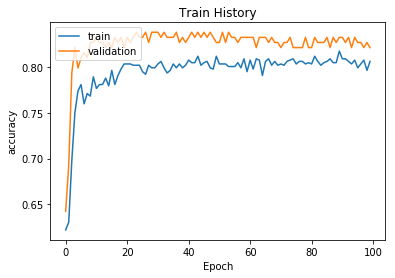

In [96]:
show_train_history('accuracy', 'val_accuracy')

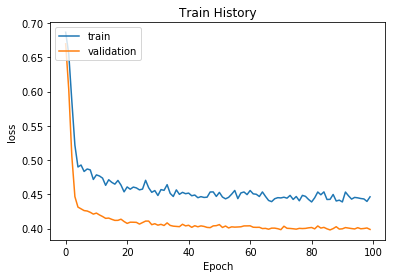

In [97]:
show_train_history('loss', 'val_loss')

### 使用MLP的話可以將準確率提升至80%以上，但還是有一點overfitting

In [98]:
test_X = data.drop(['Survived', 'Name', 'Cabin', 'Ticket', 'Age', 'Family_minus', 'Family_Size'], axis=1).iloc[891:]
test_X.tail()

,Pclass,Sex,SibSp,Parch,Fare,Embarked_C,Embarked_None,Embarked_Q,Embarked_S
413,1.0,1.0,0.000,0.000000,2.202765,0.0,0.0,0.0,1.0
414,0.0,0.0,0.000,0.000000,4.699571,1.0,0.0,0.0,0.0
415,1.0,1.0,0.000,0.000000,2.110213,0.0,0.0,0.0,1.0
416,1.0,1.0,0.000,0.000000,2.202765,0.0,0.0,0.0,1.0
417,1.0,1.0,0.125,0.111111,3.150952,1.0,0.0,0.0,0.0


In [99]:
all_probabilit = model.predict(test_X)

In [100]:
all_probabilit

array([[0.07606956],
       [0.31373692],
       [0.12317926],
       [0.12517479],
       [0.34724936],
       [0.12733176],
       [0.7597201 ],
       [0.23292628],
       [0.6155994 ],
       [0.1267038 ],
       [0.12207979],
       [0.33511427],
       [0.9809166 ],
       [0.2296224 ],
       [0.97760653],
       [0.8969646 ],
       [0.13439903],
       [0.20995423],
       [0.33321443],
       [0.6155558 ],
       [0.36291492],
       [0.09640661],
       [0.97585356],
       [0.35885853],
       [0.9677125 ],
       [0.12576964],
       [0.971651  ],
       [0.20995423],
       [0.33810622],
       [0.23401898],
       [0.2296224 ],
       [0.20983571],
       [0.3754628 ],
       [0.4026836 ],
       [0.36250085],
       [0.20998034],
       [0.47082478],
       [0.49006006],
       [0.12835425],
       [0.2289572 ],
       [0.24095786],
       [0.33557105],
       [0.12188879],
       [0.89545155],
       [0.9757046 ],
       [0.12220123],
       [0.34603173],
       [0.075

In [101]:
Survived_data = []
for i in np.array(all_probabilit):
    if i > 0.5:
        Survived_data.append(1)
    else:
        Survived_data.append(0)
print(Survived_data)

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

In [102]:
len(Survived_data)

418

In [103]:
all_probabilit = pd.DataFrame(Survived_data, columns=['Survived'])

In [104]:
all_probabilit.head()

,Survived
0,0
1,0
2,0
3,0
4,0


In [105]:
all_probabilit = pd.concat([PassengerId, all_probabilit], axis=1)

In [106]:
all_probabilit.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


### 輸出提交到Kaggle看看

In [107]:
all_probabilit.to_csv("submit.csv",index=False)

### 繼續沒處裡完的欄位

In [108]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Family_Size,Family_minus,Embarked_C,Embarked_None,Embarked_Q,Embarked_S
0,0.0,1.0,"Braund, Mr. Owen Harris",1.0,22.0,0.125,0.0,A/5 21171,2.110213,NaN,0.1,0.357143,0.0,0.0,0.0,1.0
1,1.0,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,0.125,0.0,PC 17599,4.280593,C85,0.1,0.357143,1.0,0.0,0.0,0.0
2,1.0,1.0,"Heikkinen, Miss. Laina",0.0,26.0,0.000,0.0,STON/O2. 3101282,2.188856,NaN,0.0,0.428571,0.0,0.0,0.0,1.0
3,1.0,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,0.125,0.0,113803,3.990834,C123,0.1,0.357143,0.0,0.0,0.0,1.0
4,0.0,1.0,"Allen, Mr. William Henry",1.0,35.0,0.000,0.0,373450,2.202765,NaN,0.0,0.428571,0.0,0.0,0.0,1.0


### 沒處裡的欄位有Name, Age, Ticket, Fare, Cabin

### 有發現Fare=0的值，為職員?

In [76]:
data[data['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_minus
179,180,0.0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,1,1
263,264,0.0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,1,1
271,272,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,1,1
277,278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,1,1
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,1,1
413,414,0.0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,1,1
466,467,0.0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,1,1
481,482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,1,1
597,598,0.0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,1,1
633,634,0.0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,1,1


### 看得出來，Fare=0的欄位應是職員沒錯，且同樣均從Embarked_S上船

In [77]:
data['Worker'] = data['Fare'].apply(lambda x : 1 if x==0 else 0)

In [78]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_minus,Worker
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,0
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,1,0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1,0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5,-1,0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3,3,0
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2,0,0


In [79]:
train_X = data.drop(['Survived', 'Name', 'Cabin', 'Ticket', 'Age'], axis=1).iloc[:891]
train_X.tail()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Family_Size,Family_minus,Worker
886,887,2,male,0,0,13.00,S,1,1,0
887,888,1,female,0,0,30.00,S,1,1,0
888,889,3,female,1,2,23.45,S,4,2,0
889,890,1,male,0,0,30.00,C,1,1,0
890,891,3,male,0,0,7.75,Q,1,1,0


In [80]:
estimator = RandomForestClassifier()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

NameError: name 'RandomForestClassifier' is not defined

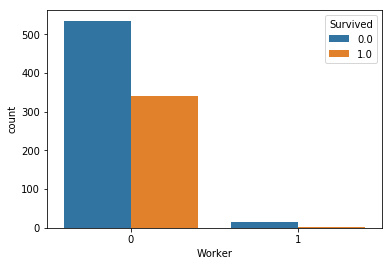

In [81]:
sns.countplot(data['Worker'], hue=data['Survived'])

In [115]:
data[data['Worker']==1]['Survived'].value_counts(normalize=True)

0.0    0.933333
1.0    0.066667
Name: Survived, dtype: float64

### 職員幾乎都沒存活

In [116]:
data[data['Worker']==0]['Survived'].value_counts(normalize=True)

0.0    0.610731
1.0    0.389269
Name: Survived, dtype: float64

### 而非職員則無如此懸殊差距

## 觀察職員平均年齡，可填補缺失值

In [117]:
data.groupby(['Worker'])['Age'].median()

Worker
0    28.0
1    38.5
Name: Age, dtype: float64

In [118]:
# 觀察欄位相異值數量
data.select_dtypes(include=["object"]).apply(pd.Series.nunique)

Name      1307
Ticket     929
Cabin      186
dtype: int64

In [119]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Family_Size,Family_minus,Embarked_C,Embarked_None,Embarked_Q,Embarked_S,Worker
0,0.0,1.0,"Braund, Mr. Owen Harris",1.0,22.0,0.125,0.0,A/5 21171,2.110213,NaN,0.1,0.357143,0.0,0.0,0.0,1.0,0
1,1.0,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,0.125,0.0,PC 17599,4.280593,C85,0.1,0.357143,1.0,0.0,0.0,0.0,0
2,1.0,1.0,"Heikkinen, Miss. Laina",0.0,26.0,0.000,0.0,STON/O2. 3101282,2.188856,NaN,0.0,0.428571,0.0,0.0,0.0,1.0,0
3,1.0,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,0.125,0.0,113803,3.990834,C123,0.1,0.357143,0.0,0.0,0.0,1.0,0
4,0.0,1.0,"Allen, Mr. William Henry",1.0,35.0,0.000,0.0,373450,2.202765,NaN,0.0,0.428571,0.0,0.0,0.0,1.0,0


In [120]:
data['Title'] = data['Name'].apply(lambda x : x.split(', ')[1].split('. ')[0])
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Family_Size,Family_minus,Embarked_C,Embarked_None,Embarked_Q,Embarked_S,Worker,Title
0,0.0,1.0,"Braund, Mr. Owen Harris",1.0,22.0,0.125,0.0,A/5 21171,2.110213,NaN,0.1,0.357143,0.0,0.0,0.0,1.0,0,Mr
1,1.0,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,0.125,0.0,PC 17599,4.280593,C85,0.1,0.357143,1.0,0.0,0.0,0.0,0,Mrs
2,1.0,1.0,"Heikkinen, Miss. Laina",0.0,26.0,0.000,0.0,STON/O2. 3101282,2.188856,NaN,0.0,0.428571,0.0,0.0,0.0,1.0,0,Miss
3,1.0,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,0.125,0.0,113803,3.990834,C123,0.1,0.357143,0.0,0.0,0.0,1.0,0,Mrs
4,0.0,1.0,"Allen, Mr. William Henry",1.0,35.0,0.000,0.0,373450,2.202765,NaN,0.0,0.428571,0.0,0.0,0.0,1.0,0,Mr


In [121]:
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [122]:
data['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Ms                2
Mlle              2
Dona              1
Capt              1
Lady              1
Sir               1
Don               1
the Countess      1
Mme               1
Jonkheer          1
Name: Title, dtype: int64

In [124]:
data.groupby(['Title'])['Age'].median()

Title
Capt            70.0
Col             54.5
Don             40.0
Dona            39.0
Dr              49.0
Jonkheer        38.0
Lady            48.0
Major           48.5
Master           4.0
Miss            22.0
Mlle            24.0
Mme             24.0
Mr              29.0
Mrs             35.5
Ms              28.0
Rev             41.5
Sir             49.0
the Countess    33.0
Name: Age, dtype: float64

In [125]:
data.groupby(['Title'])['Age'].mean()

Title
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

### 由以上可以看出稱謂對應年紀的分布

In [967]:
data[data['Title'] == 'Capt']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Family_Size,Family_minus,Embarked_C,Embarked_None,Embarked_Q,Embarked_S,Worker,Title
745,0.0,0.0,"Crosby, Capt. Edward Gifford",1.0,70.0,0.125,0.111111,WE/P 5735,4.276666,B22,0.2,0.428571,0.0,0.0,0.0,1.0,0,Capt


In [23]:
data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [24]:
data['First_Name'] = data['Name'].str.split(', ', expand=True)[0]

In [25]:
data['First_Name'].head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: First_Name, dtype: object

In [75]:
data['Title'] = data['Name'].str.split(', ', expand=True)[1]

In [76]:
data['Title'].head()

0                               Mr. Owen Harris
1    Mrs. John Bradley (Florence Briggs Thayer)
2                                   Miss. Laina
3            Mrs. Jacques Heath (Lily May Peel)
4                             Mr. William Henry
Name: Title, dtype: object

In [77]:
data['Title'] = data['Title'].str.split('. ', expand=True)[0]

In [78]:
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'th', 'Jonkheer',
       'Dona'], dtype=object)

In [79]:
pd.crosstab(data['Title'], data['Sex']).T

Title,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,th
Sex,,,,,,,,,,,,,,,,,,
0,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
1,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [80]:
pd.crosstab(data['Title'], data['Sex']).T.style.background_gradient(cmap='summer_r')

Title,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,th
Sex,,,,,,,,,,,,,,,,,,
0,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
1,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [81]:
pd.crosstab(data['Title'], data['Survived']).T.style.background_gradient(cmap='summer_r')

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,th
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1.0,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [82]:
test['Name'].str.split(', ', expand=True)[1].str.split('. ', expand=True)[0].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [83]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket_info,Ticket_choose,First_Name
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,2,Mr,2,21171,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Mrs,14,17599,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,2,Miss,31,3101282,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2,Mrs,36,113803,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,2,Mr,36,373450,Allen


In [84]:
test_title = test['Name'].str.split(', ', expand=True)[1].str.split('. ', expand=True)[0].unique()
train_title = train['Name'].str.split(', ', expand=True)[1].str.split('. ', expand=True)[0].unique()

In [86]:
test_title

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [87]:
train_title

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'th', 'Jonkheer'],
      dtype=object)

In [88]:
data.groupby(['Title'])['Age'].mean()

Title
Capt        70.000000
Col         54.000000
Don         40.000000
Dona        39.000000
Dr          43.571429
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       5.482642
Miss        21.774238
Mlle        24.000000
Mme         24.000000
Mr          32.252151
Mrs         36.994118
Ms          28.000000
Rev         41.250000
Sir         49.000000
th          33.000000
Name: Age, dtype: float64

In [89]:
data.groupby(['Title', 'Pclass'])['Age'].mean()

Title     Pclass
Capt      1         70.000000
Col       1         54.000000
Don       1         40.000000
Dona      1         39.000000
Dr        1         45.600000
          2         38.500000
Jonkheer  1         38.000000
Lady      1         48.000000
Major     1         48.500000
Master    1          6.984000
          2          2.757273
          3          6.090000
Miss      1         30.338983
          2         20.717083
          3         17.360874
Mlle      1         24.000000
Mme       1         24.000000
Mr        1         41.450758
          2         32.346715
          3         28.318910
Mrs       1         43.208955
          2         33.518519
          3         32.326531
Ms        2         28.000000
          3               NaN
Rev       2         41.250000
Sir       1         49.000000
th        1         33.000000
Name: Age, dtype: float64

In [90]:
train_title

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'th', 'Jonkheer'],
      dtype=object)

In [91]:
test_title

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [92]:
data['Title'] = data['Title'].replace(['Col','Don', 'Dr', 'Major', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace(['Capt', 'Rev'], 'Worker')
data['Title'] = data['Title'].replace('Lady' ,'Mrs')
data['Title'] = data['Title'].replace('Mme' ,'Miss')
data['Title'] = data['Title'].replace('Mlle' ,'Miss')
data['Title'] = data['Title'].replace('Ms' ,'Miss')
data['Title'] = data['Title'].replace('th' ,'Miss')

In [93]:
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare', 'Worker'], dtype=object)

In [94]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket_info,Ticket_choose,First_Name
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,2,Mr,2,21171,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Mrs,14,17599,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,2,Miss,31,3101282,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2,Mrs,36,113803,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,2,Mr,36,373450,Allen


In [95]:
data['First_Name'].unique()

array(['Braund', 'Cumings', 'Heikkinen', 'Futrelle', 'Allen', 'Moran',
       'McCarthy', 'Palsson', 'Johnson', 'Nasser', 'Sandstrom', 'Bonnell',
       'Saundercock', 'Andersson', 'Vestrom', 'Hewlett', 'Rice',
       'Williams', 'Vander Planke', 'Masselmani', 'Fynney', 'Beesley',
       'McGowan', 'Sloper', 'Asplund', 'Emir', 'Fortune', "O'Dwyer",
       'Todoroff', 'Uruchurtu', 'Spencer', 'Glynn', 'Wheadon', 'Meyer',
       'Holverson', 'Mamee', 'Cann', 'Nicola-Yarred', 'Ahlin', 'Turpin',
       'Kraeff', 'Laroche', 'Devaney', 'Rogers', 'Lennon', "O'Driscoll",
       'Samaan', 'Arnold-Franchi', 'Panula', 'Nosworthy', 'Harper',
       'Faunthorpe', 'Ostby', 'Woolner', 'Rugg', 'Novel', 'West',
       'Goodwin', 'Sirayanian', 'Icard', 'Harris', 'Skoog', 'Stewart',
       'Moubarek', 'Nye', 'Crease', 'Kink', 'Jenkin', 'Hood',
       'Chronopoulos', 'Bing', 'Moen', 'Staneff', 'Moutal', 'Caldwell',
       'Dowdell', 'Waelens', 'Sheerlinck', 'McDermott', 'Carrau', 'Ilett',
       'Backstrom

In [36]:
pd.crosstab(data['Title'], data['Sex']).T.style.background_gradient(cmap='summer_r')

Title,Master,Miss,Mr,Mrs,Rare,Worker
Sex,,,,,,
female,0,266,0,198,2,0
male,61,0,757,0,16,9


In [37]:
pd.crosstab(data['Title'], data['Survived']).T.style.background_gradient(cmap='summer_r')

Title,Master,Miss,Mr,Mrs,Rare,Worker
Survived,,,,,,
0.0,17,55,436,26,8,7
1.0,23,132,81,100,6,0


In [38]:
data[data['Title'] == 'Worker']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
149,150,0.0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,NaN,S,Worker
150,151,0.0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,NaN,S,Worker
249,250,0.0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,NaN,S,Worker
626,627,0.0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,NaN,Q,Worker
745,746,0.0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.000,B22,S,Worker
848,849,0.0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,NaN,S,Worker
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S,Worker
149,1041,NaN,2,"Lahtinen, Rev. William",male,30.0,1,1,250651,26.000,NaN,S,Worker
164,1056,NaN,2,"Peruschitz, Rev. Joseph Maria",male,41.0,0,0,237393,13.000,NaN,S,Worker


In [39]:
data[data['Title'] == 'Rare']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
30,31,0.0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,Rare
245,246,0.0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,Rare
317,318,0.0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,Rare
398,399,0.0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,Rare
449,450,1.0,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S,Rare
536,537,0.0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S,Rare
599,600,1.0,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,Rare
632,633,1.0,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,Rare
647,648,1.0,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C,Rare
660,661,1.0,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,Rare


In [40]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [41]:
data['Ticket']

0               A/5 21171
1                PC 17599
2        STON/O2. 3101282
3                  113803
4                  373450
5                  330877
6                   17463
7                  349909
8                  347742
9                  237736
10                PP 9549
11                 113783
12              A/5. 2151
13                 347082
14                 350406
15                 248706
16                 382652
17                 244373
18                 345763
19                   2649
20                 239865
21                 248698
22                 330923
23                 113788
24                 349909
25                 347077
26                   2631
27                  19950
28                 330959
29                 349216
              ...        
388                364858
389                349909
390                 12749
391              PC 17592
392             C.A. 2673
393            C.A. 30769
394                315153
395         

In [42]:
data['Ticket_info'] = data['Ticket'].apply(lambda x : x.replace('.','').replace('/','').strip().split(' ')[0] if not x.isdigit() else 'X')

In [43]:
data['Ticket_info']

0           A5
1           PC
2       STONO2
3            X
4            X
5            X
6            X
7            X
8            X
9            X
10          PP
11           X
12          A5
13           X
14           X
15           X
16           X
17           X
18           X
19           X
20           X
21           X
22           X
23           X
24           X
25           X
26           X
27           X
28           X
29           X
        ...   
388          X
389          X
390          X
391         PC
392         CA
393         CA
394          X
395          X
396          X
397          X
398          X
399          X
400          X
401          X
402          X
403          X
404          X
405    SCPARIS
406          X
407          X
408          X
409    SOTONOQ
410          X
411          X
412          X
413         A5
414         PC
415    SOTONOQ
416          X
417          X
Name: Ticket_info, Length: 1309, dtype: object

In [44]:
data['Ticket_choose'] = data['Ticket'].apply(lambda x : x.replace('A/5 ','').replace('PC ','').replace('STON/O2. ','').replace('C.A. ','').replace('SC/PARIS ','').replace('S.C./A.4. ','').replace('PP ','').replace('A./5. ','').replace('A/5. ','').replace('SOTON/O.Q. ','').replace('A.5. ','').replace('CA. ',''))
#data['Ticket_choose'] = data['Ticket'].apply(lambda x : x.replace('PC ',''))
#data['Ticket_choose'] = data['Ticket'].apply(lambda x : x.replace('STON/O2. ',''))
#data['Ticket_choose'] = data['Ticket'].apply(lambda x : str(x).replace('C.A. ',''))
#data['Ticket_choose'] = data['Ticket'].apply(lambda x : str(x).replace('SC/PARIS ',''))
#data['Ticket_choose'] = data['Ticket'].apply(lambda x : str(x).replace('S.C./A.4. ',''))
#data['Ticket_choose'] = data['Ticket'].apply(lambda x : str(x).replace('PP ',''))
#data['Ticket_choose'] = data['Ticket'].apply(lambda x : str(x).replace('A./5. ',''))


In [45]:
data['Ticket_choose'].describe(include='all')

count     1309
unique     926
top       2343
freq        11
Name: Ticket_choose, dtype: object

In [46]:
data['Ticket_choose']

0        21171
1        17599
2      3101282
3       113803
4       373450
5       330877
6        17463
7       349909
8       347742
9       237736
10        9549
11      113783
12        2151
13      347082
14      350406
15      248706
16      382652
17      244373
18      345763
19        2649
20      239865
21      248698
22      330923
23      113788
24      349909
25      347077
26        2631
27       19950
28      330959
29      349216
        ...   
388     364858
389     349909
390      12749
391      17592
392       2673
393      30769
394     315153
395      13695
396     371109
397      13567
398     347065
399      21332
400      36928
401      28664
402     112378
403     113059
404      17765
405       2166
406      28666
407     113503
408     334915
409    3101315
410     365237
411      19928
412     347086
413       3236
414      17758
415    3101262
416     359309
417       2668
Name: Ticket_choose, Length: 1309, dtype: object

In [47]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket_info,Ticket_choose
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,A5,21171
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,PC,17599
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,STONO2,3101282
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,X,113803
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,X,373450


In [48]:
data['Embarked'] = data['Embarked'].fillna('S')

In [49]:
data['Fare'].median()

14.4542

In [50]:
data['Fare'].mean()

33.2954792813456

C:\Users\Master\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Master\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


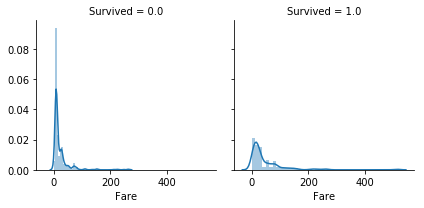

In [51]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Fare', kde='False')

In [52]:
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

In [53]:
data['Cabin'].head(20)

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
Name: Cabin, dtype: object

In [54]:
data['Cabin'] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')

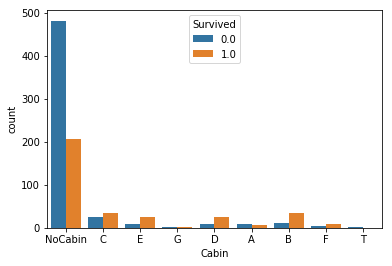

In [55]:
sns.countplot(data['Cabin'], hue=data['Survived'])

In [56]:
data['Sex'] = data['Sex'].astype('category').cat.codes

In [57]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket_info,Ticket_choose
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NoCabin,S,Mr,A5,21171
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C,Mrs,PC,17599
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NoCabin,S,Miss,STONO2,3101282
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S,Mrs,X,113803
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NoCabin,S,Mr,X,373450


In [58]:
data['Cabin'] = data['Cabin'].astype('category').cat.codes
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['Title'] = data['Title'].astype('category').cat.codes
data['Ticket_info'] = data['Ticket_info'].astype('category').cat.codes

In [59]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket_info,Ticket_choose
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,2,2,2,21171
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,3,14,17599
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,2,1,31,3101282
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2,3,36,113803
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,2,2,36,373450


In [60]:
data['Age'].describe(include='all')

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [61]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Ticket_info
count,1309.000000,891.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,0.644003,29.881138,0.498854,0.385027,33.281086,5.955691,1.493506,1.902979,30.428571
std,378.020061,0.486592,0.837836,0.478997,14.413493,1.041658,0.865560,51.741500,2.057178,0.814244,0.805504,10.479504
min,1.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,7.000000,1.000000,2.000000,31.000000
50%,655.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,7.000000,2.000000,2.000000,36.000000
75%,982.000000,1.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,7.000000,2.000000,2.000000,36.000000
max,1309.000000,1.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,8.000000,2.000000,5.000000,36.000000
